In [1]:
from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
def obtain_prices_df(csv_filepath, end_date=None):
    """
    Obtain the prices DataFrame from the CSV file,
    filter by the end date and calculate the 
    percentage returns.
    """
    df = pd.read_csv(
        csv_filepath, header=0,
        names=[
            "Date", "Open", "High", "Low", 
            "Close", "Volume", "Adj Close"
        ],
        index_col="Date", parse_dates=True
    )
    df["Returns"] = df["Adj Close"].pct_change()
    if end_date:
        df = df[:end_date.strftime("%Y-%m-%d")]
    df.dropna(inplace=True)
    return df

In [5]:
base_file = r'D:\MyProjects\ITC\0 - Projects\Project2 - Final\from_YahooFinancials\IXIC.csv'
df = obtain_prices_df(base_file)
df

,Open,High,Low,Close,Volume,Adj Close,Returns
Date,,,,,,,
1990-01-03,461.60,460.00,461.10,460.90,152660000,460.90,0.003484
1990-01-04,460.80,456.90,460.40,459.40,147950000,459.40,-0.003255
1990-01-05,459.40,457.80,457.90,458.20,137230000,458.20,-0.002612
1990-01-08,458.70,456.50,457.10,458.70,115500000,458.70,0.001091
1990-01-09,459.60,456.60,459.20,456.80,131130000,456.80,-0.004142
...,...,...,...,...,...,...,...
2021-07-06,14687.00,14529.80,14661.55,14663.64,4464780000,14663.64,0.001661
2021-07-07,14755.33,14580.79,14753.41,14665.06,4582030000,14665.06,0.000097
2021-07-08,14610.06,14371.59,14409.20,14559.78,4550600000,14559.78,-0.007179


In [9]:
def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(hmm_model.n_components, sharex=True, sharey=True, figsize=(16,6))
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Adj Close"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()

Model Score: 11149.699728960506


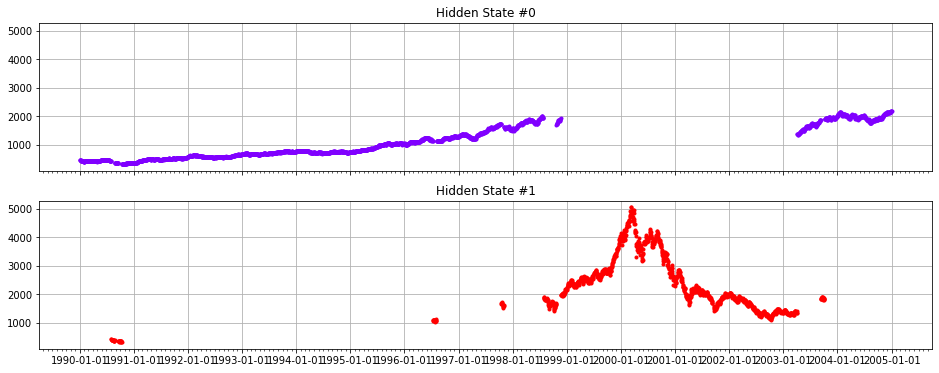

Pickling HMM model...
...HMM model pickled.


In [10]:
if __name__ == "__main__":
    # Hides deprecation warnings for sklearn
    warnings.filterwarnings("ignore")

    # Create the SPY dataframe from the Yahoo Finance CSV
    # and correctly format the returns for use in the HMM
    csv_filepath = base_file
    pickle_path = "hmm_model_spy.pkl"
    end_date = datetime.datetime(2004, 12, 31)
    spy = obtain_prices_df(csv_filepath, end_date)
    rets = np.column_stack([spy["Returns"]])

    # Create the Gaussian Hidden markov Model and fit it
    # to the SPY returns data, outputting a score
    hmm_model = GaussianHMM(
        n_components=2, covariance_type="full", n_iter=1000
    ).fit(rets)
    print("Model Score:", hmm_model.score(rets))
  
    # Plot the in sample hidden states closing values
    plot_in_sample_hidden_states(hmm_model, spy)

    print("Pickling HMM model...")
    pickle.dump(hmm_model, open(pickle_path, "wb"))
    print("...HMM model pickled.")